# DBSCAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
X=pd.read_csv('Leukemia_GSE9476.csv')

In [3]:
X.head(3)

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152


In [4]:
print("Column names",X.columns[:20])

Column names Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at', '1405_i_at', '1431_at',
       '1438_at', '1487_at', '1494_f_at', '1598_g_at', '160020_at', '1729_at',
       '1773_at', '177_at'],
      dtype='object')


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 22285 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(22283), int64(1), object(1)
memory usage: 10.9+ MB


# Missing value
### Check for Missing values

In [6]:
print("Missing Values =",X.isnull().sum().sum())

Missing Values = 0


# Encoding

#### Find categorical and numerical columns

In [8]:

data_float=X.select_dtypes(include=[np.float])

data_int=X.select_dtypes(include=[np.int])

data_object=X.select_dtypes(include=[object])

In [9]:
print("float :",data_float.columns)
print("int :",data_int.columns)
print("object :",data_object.columns)

float : Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Hs28SrRNA-5_at', 'AFFX-r2-Hs28SrRNA-M_at',
       'AFFX-r2-P1-cre-3_at', 'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at',
       'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'],
      dtype='object', length=22283)
int : Index([], dtype='object')
object : Index(['type'], dtype='object')


### encodeing type feature 

In [10]:
print(X['type'].value_counts())

AML                 26
PBSC_CD34           10
PB                  10
Bone_Marrow         10
Bone_Marrow_CD34     8
Name: type, dtype: int64


In [11]:
data_enc=pd.get_dummies(X,columns=['type'])

# Scaleing

In [12]:
# from sklearn.preprocessing import MinMaxScaler
# Scaleddata = MinMaxScaler(feature_range=(0, 1)).fit_transform(data_enc)
# data_scale = pd.DataFrame(Scaleddata,columns=data_enc.columns)

In [13]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler(copy=True, with_mean=True, with_std=True) 
standard_scaler.fit(data_enc)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Dimensionalty Reducation

In [14]:
pca = PCA(n_components = 2).fit(data_enc) 
pca_2d = pca.transform(data_enc)

# outlier

#### useing zscore

In [15]:
from scipy import stats
data_cll=pca_2d[(np.abs(stats.zscore(pca_2d))<1.7).all(axis=1)]
data_cll.shape

(51, 2)

In [16]:
# data_s = pca_2d.iloc[:,0:2284].values

(51, 2)


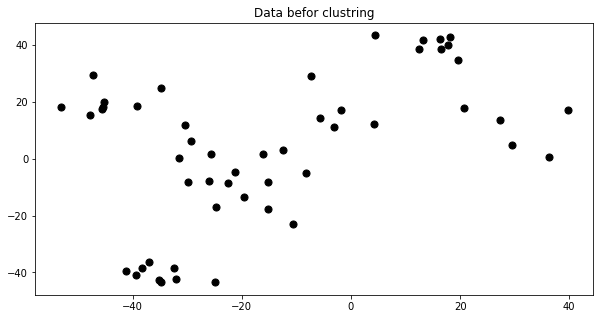

In [17]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Data befor clustring")
ax.scatter(data_cll[:,0],data_cll[:,1],c='k',s=50,cmap = 'inferno');
print(data_cll.shape)

# CLUSTERING WITH DBSCAN

In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps =10,min_samples=4).fit(pca_2d)
dbscan_labels = dbscan.labels_

cor_samples=np.zeros_like(dbscan_labels,dtype=bool)
cor_samples[dbscan.core_sample_indices_]=True
print(cor_samples)
print(dbscan_labels)


[False  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True  True False False False False  True  True
  True False False False  True  True  True  True  True  True  True  True
 False False False  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2 -1  2 -1  2  3
  2 -1 -1  3  2  2  2  2  2  2  2  3 -1 -1  3  2  2  2  2  2  4  4  4  4
  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5]


In [19]:
n_clusters=len(set(dbscan_labels))-(1 if -1 in dbscan_labels else 0)
n_clusters

6

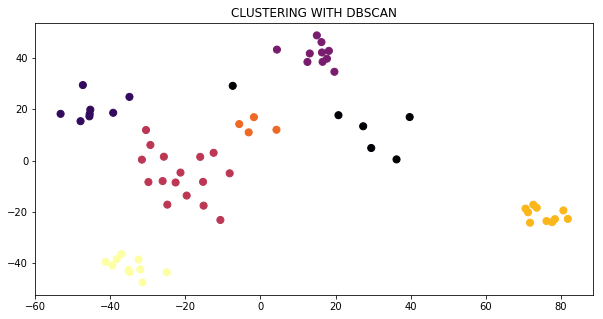

In [20]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("CLUSTERING WITH DBSCAN")
ax.scatter(pca_2d[:,0],pca_2d[:,1],c=dbscan_labels,s=50,cmap = 'inferno');

# Kmeans

In [21]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=6)
Kmeans_label=Kmeans.fit_predict(pca_2d)
# plt.scatter(pca_2d[:,0],pca_2d[:,0],c=Kmeans_label,s=50,cmap = 'inferno')
# plt.show()

# validation

In [22]:
from sklearn import metrics
print("silhouette coefficient DBSCAN : %0.3f" % metrics.silhouette_score(pca_2d,dbscan_labels))
print("silhouette coefficient Kmeans: %0.3f" % metrics.silhouette_score(pca_2d,Kmeans_label))

silhouette coefficient DBSCAN : 0.637
silhouette coefficient Kmeans: 0.633


In [24]:
from scipy.spatial.distance import euclidean
dbscan_score=DBCV(pca_2d,dbscan_labels,dist_function=euclidean)
kmean_score=DBCV(pca_2d,Kmeans_label,dist_function=euclidean)
print(kmean_score,dbscan_score)

0.15046917721271405 0.18799477122727987


# CLUSTERING WITH OPTICS

In [47]:
from sklearn.cluster import OPTICS 

In [48]:
optics = OPTICS(min_samples = 4,eps=10, xi = 0.05, min_cluster_size = 0.05).fit(pca_2d)
labeloptics=optics.labels_
labeloptics

array([-1,  0,  0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3, -1,  4, -1, -1, -1,  2, -1, -1,  4,  2,  1, -1, -1,  1,  1,  1,
        1,  2,  4,  4,  2,  1,  1,  1, -1, -1,  7,  6,  6,  6,  7,  6,  7,
        7,  6,  7,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5])

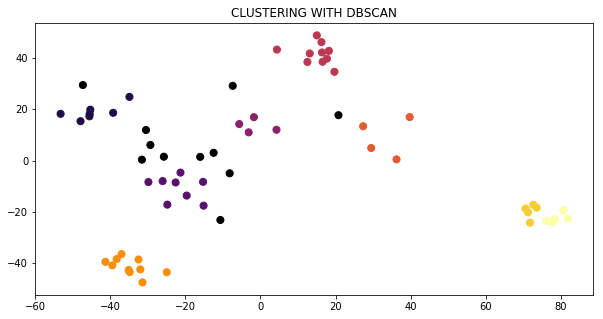

In [49]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("CLUSTERING WITH OPTICS")
ax.scatter(pca_2d[:,0],pca_2d[:,1],c=labeloptics,s=50,cmap = 'inferno');

# Hierarchical Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('Leukemia_GSE9476.csv')

In [3]:
df.shape

(64, 22285)

In [4]:
df.groupby(['type'])['type'].count()

type
AML                 26
Bone_Marrow         10
Bone_Marrow_CD34     8
PB                  10
PBSC_CD34           10
Name: type, dtype: int64

In [5]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


In [6]:
data = df.iloc[:, 64:22285].values

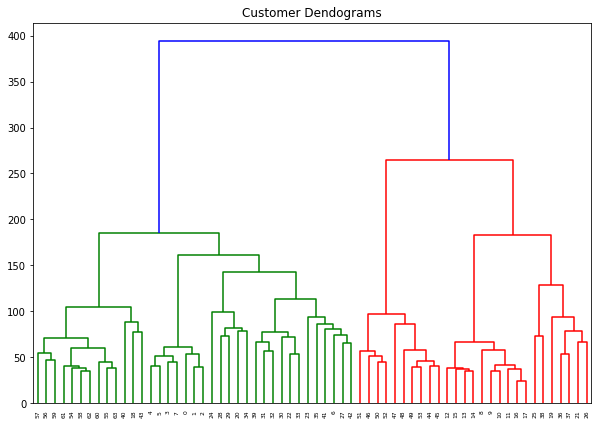

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))


In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_hc=cluster.fit_predict(data)

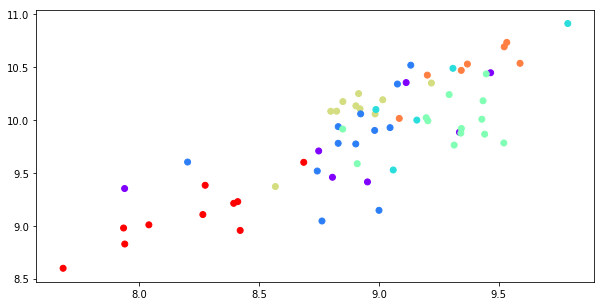

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

# Spectral Biclustering, Spectral Coclustering

In [10]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [11]:
from pandas import read_csv, DataFrame
raw_data = pd.read_csv('Leukemia_GSE9476.csv')
print(raw_data.shape)
raw_data.head()

(64, 22285)


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


In [12]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
pca = PCA()

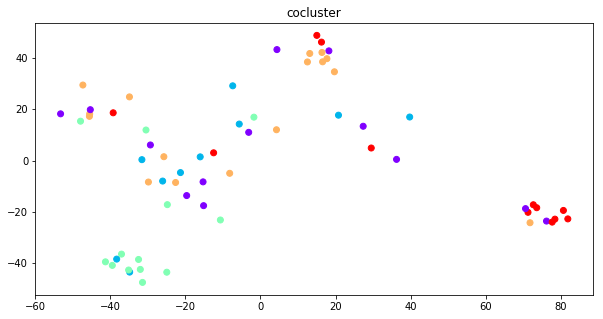

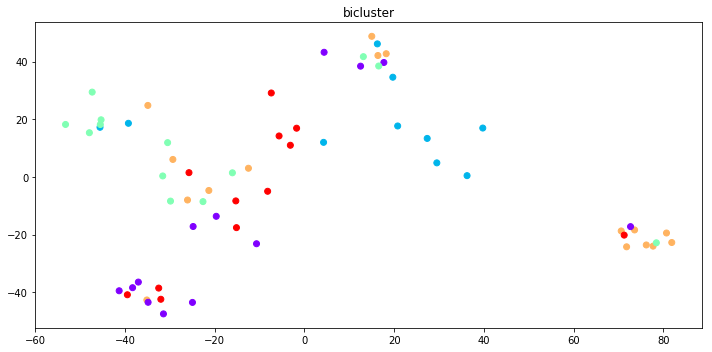

In [14]:
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
from pandas import read_csv, DataFrame


target="type"
features = [feature for feature in raw_data.columns if feature != target]
#########################################
data=raw_data

from sklearn.preprocessing import normalize, scale

normed = normalize(data.drop(target,1))

from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering

from numpy import argsort
from matplotlib.pyplot import show, imshow, figure, subplot, suptitle, tight_layout, xticks, xlabel

def pipeline(n, input_df):
    
    cocluster = SpectralCoclustering(n_clusters = n)
    cocluster.fit(input_df.values)
    cocluster_fit_data = input_df.values[argsort(cocluster.row_labels_)]
    cocluster_fit_data = cocluster_fit_data[:, argsort(cocluster.column_labels_)]
    
    bicluster = SpectralBiclustering(n_clusters = n)
    bicluster.fit(input_df.values)
    bicluster_fit_data = input_df.values[argsort(bicluster.row_labels_)]
    bicluster_fit_data = bicluster_fit_data[:, argsort(bicluster.column_labels_)]
    
#     figure(figsize=(16,25))
    #suptitle("Mushrooms\n" + "n_clusters = " + str(n),fontsize=32, fontweight='bold')
    
#     left_plot = subplot(211)
#     ax = imshow(bicluster_fit_data, aspect='auto', cmap="bone")
#     #xticks(range(0,len(input_df.columns)), list(input_df.columns[bicluster.column_labels_]),rotation='vertical')
#     xlabel("Biclustering")
    
#     right_plot = subplot(212)
#     ax = imshow(cocluster_fit_data, aspect='auto', cmap="bone")
    ##############################
    fig,ax=plt.subplots(figsize=(10,5))
    ax.set_title("cocluster")
    pca=PCA(n_components=n).fit(cocluster_fit_data)
    pca_2d=pca.transform(cocluster_fit_data)
    ax.scatter(pca_2d[:,0],pca_2d[:,1], c=bicluster.row_labels_,cmap='rainbow')
    
    ##############################
    fig,ax=plt.subplots(figsize=(10,5))
    ax.set_title("bicluster")
    pca=PCA(n_components=n).fit(bicluster_fit_data)
    pca_2d=pca.transform(bicluster_fit_data)
    ax.scatter(pca_2d[:,0],pca_2d[:,1], c=bicluster.row_labels_,cmap='rainbow')
    ###############################
    #xticks(range(0,len(input_df.columns)), list(input_df.columns[cocluster.column_labels_]),rotation='vertical')
#     xlabel("Coclustering")
    
    tight_layout()
    
    show()
    
from sklearn.preprocessing import LabelEncoder

# transformed = DataFrame(data, columns=features)
transformed = DataFrame(normed, columns=features)
transformed = data.copy()
transformed[target] = LabelEncoder().fit_transform(data[target])
transformed[target] = transformed[target].apply(lambda x: 0.1 if x == 0 else 0.9)


pipeline(5,transformed)